# Principal Component Analysis (PCA)

The purpose of this notebook is to show how PCA works and how to implement it using numpy.

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading Data

We will be using the [iris dataset](https://www.kaggle.com/datasets/arshid/iris-flower-dataset/data)

When calculating the principal components we will omit the species column and at the end we will color the points on the reduced dataset based on what species each plant belongs to.

We will normilize our data before calculating the principal components.

In [52]:
# Loading our dataset using pandas
df = pd.read_csv("../data/iris.csv")

# Splitting data
outcomes = np.array(df["species"].map({species: i for i, species in enumerate(df["species"].unique())}))
data = np.array(df.drop(["species"], axis=1).values)

# Normilizing data
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

print(f"Mean of each column: {np.mean(data, axis=0)}\n")
print(f"Standard deviation of each column: {np.std(data, axis=0)}")

Mean of each column: [-4.73695157e-16 -6.63173220e-16  3.31586610e-16 -2.84217094e-16]

Standard deviation of each column: [1. 1. 1. 1.]


## Calculate the principal components

To calculate the principal components we will:
1. Standardize our data
2. Calculate the covariance matrix
3. Calculate the eigenvalues and eigenvectors
4. Sort the eignevalues and eigenvectors based on the size of the eigenvalues
5. Truncate the eignevectors based on how many principal components we want
6. Square the eigenvalues to get the variance of each principal component

In [53]:
def calculate_principal_components(X, components=None):
    if components is None:
        components = X.shape[1]
    
    # Calculate covariance matrix of rows of X
    covariance = np.cov(X, rowvar=False)
    
    # Compute eigenvalues and eignenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance)
    
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Compute principal components
    principal_components = eigenvectors[:, :components]
    
    # Compute variance of the principal components
    variance = np.square(eigenvalues)[:components]
    
    return principal_components, variance

In [54]:
def project_onto_components(X, components):
    return np.dot(X, components)

## Calculate the pricipal components for out dataset

In [55]:
components, variance = calculate_principal_components(data)
variance_percentage = variance / np.sum(variance) * 100

## Plot the percentage variance of each principal component

The code below produces this graph

![Component Contributions](../Images/ComponentContribution.png)


From the graph we can see that the first principal component contributes to 90% of the variance in the data and the second principal component contributes 9% of the variance, this means by just using the first two components we account for ~99% of the variance in our data. 

When we plot the graph we should see clusters where the different species of flower are.

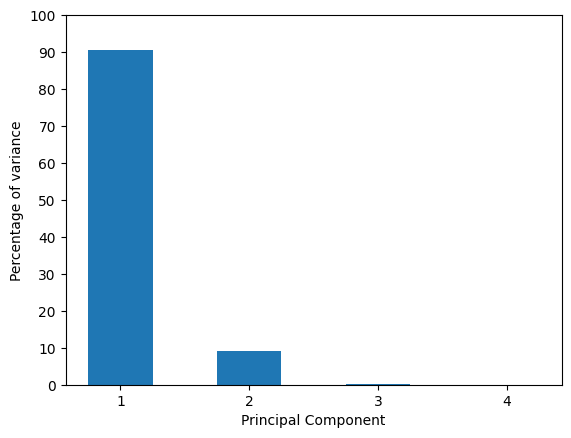

In [56]:
plt.xlabel("Principal Component")
plt.ylabel("Percentage of variance")
plt.bar(range(1, data.shape[1]+1), variance_percentage, width=0.5)
plt.xticks(range(1, data.shape[1]+1))
plt.yticks(range(0, 101, 10))
plt.show()

## Plot Projected data

The code below produces this graph

![Projected Data](..\Images\ComponentContribution.png)

From the graph we can see three distinct cluster where the three different species are


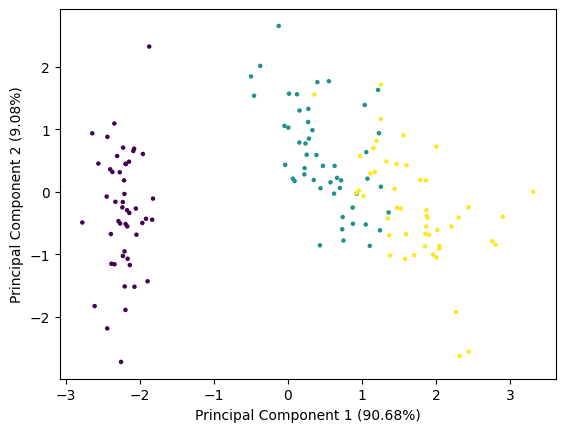

In [57]:
projections = project_onto_components(data, components=components)

plt.xlabel(f"Principal Component 1 ({variance_percentage[0]:.2f}%)")
plt.ylabel(f"Principal Component 2 ({variance_percentage[1]:.2f}%)")
plt.scatter(projections[:, 0], projections[:, 1], c=outcomes, s=5)
plt.show()